In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
plt.style.use("ggplot") 
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
print(data.shape)
data.head()



(1453, 15)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [2]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


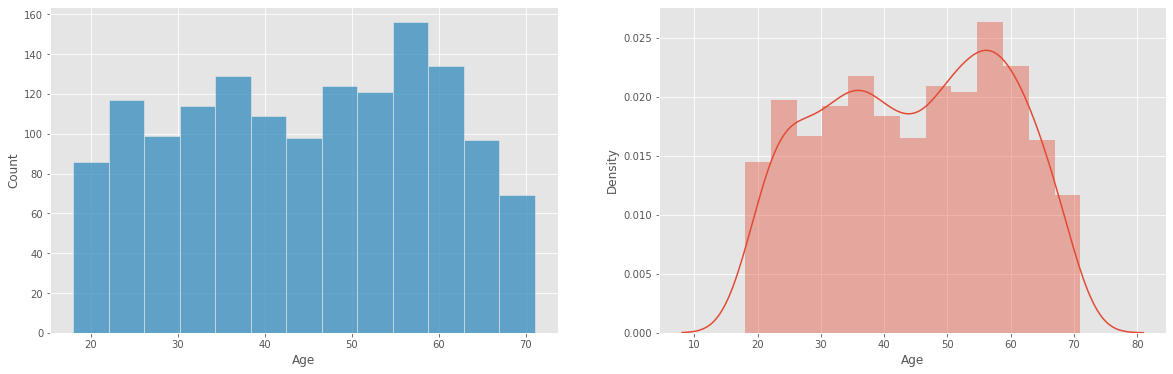

In [4]:
# Age of the customers

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data.Age)

plt.subplot(1,2,2)
sns.distplot(data.Age);

<AxesSubplot:xlabel='Age'>

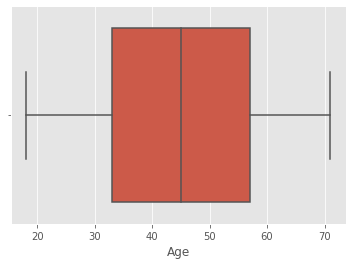

In [5]:
sns.boxplot(data.Age)

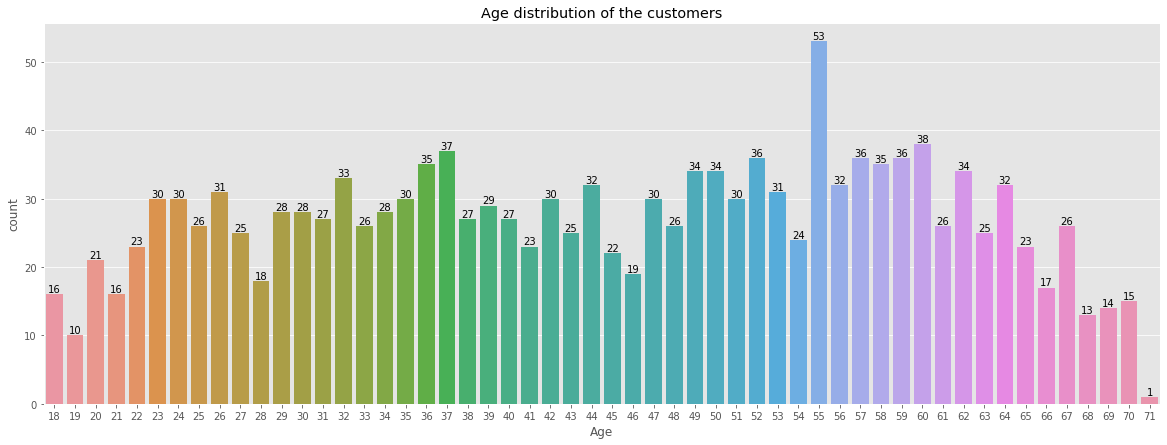

In [6]:
plt.rcParams['figure.figsize'] = (20, 7)
dis = sns.countplot(x=data['Age'])
dis.bar_label(dis.containers[0])
plt.title('Age distribution of the customers')
plt.show()

(0.0, 100.0)

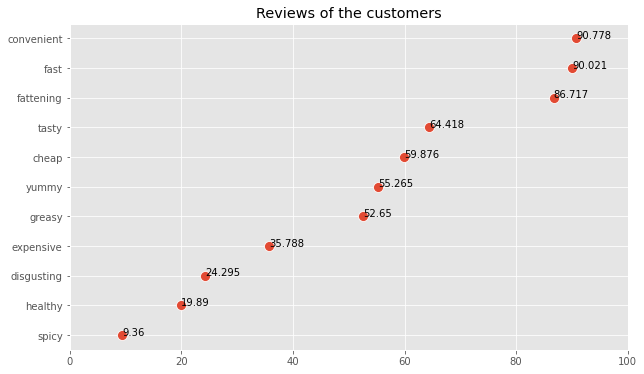

In [7]:
#Reviews of the customers

lis=[]
for i in data.columns:
    if "Yes" in data[i].values:
        lis.append(i)


ser=pd.Series([(data[i].value_counts()["Yes"]/data.shape[0])*100 for i in lis] , index=lis)
ser
ser.sort_values(ascending=False ,ignore_index=False, inplace=True)
plt.figure(figsize=(10,6))
sns.scatterplot(ser.values, ser.index, marker="o", s=100)
for i in range(ser.shape[0]):
    plt.annotate(round(ser[i],3),(ser.values[i], ser.index[i]))
    
plt.title("Reviews of the customers")

plt.xlim(0,100)


In [8]:
ser.values

array([90.77770131, 90.02064694, 86.71713696, 64.4184446 , 59.87611838,
       55.26496903, 52.6496903 , 35.78802478, 24.29456297, 19.889883  ,
        9.35994494])

Text(0.5, 1.0, 'Gender Distribution')

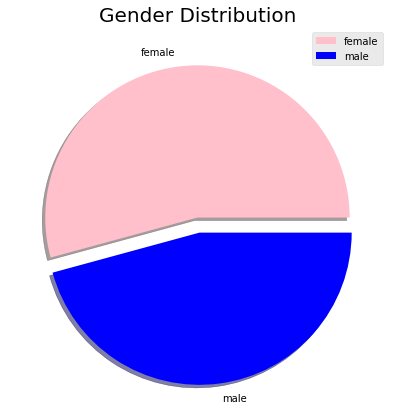

In [9]:
# gender Distribution

size = data["Gender"].value_counts()
plt.pie(size, colors = ["pink","blue"], labels=["female", "male"], shadow = True,explode = [0, 0.1])
plt.legend()

plt.title("Gender Distribution", fontsize=20)

In [10]:
# Customers response over the product

print(data["Like"].unique())
data["Like"]=data["Like"].replace({"I hate it!-5":"-5", "I love it!+5":"+5"})
print(data["Like"].unique())

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']


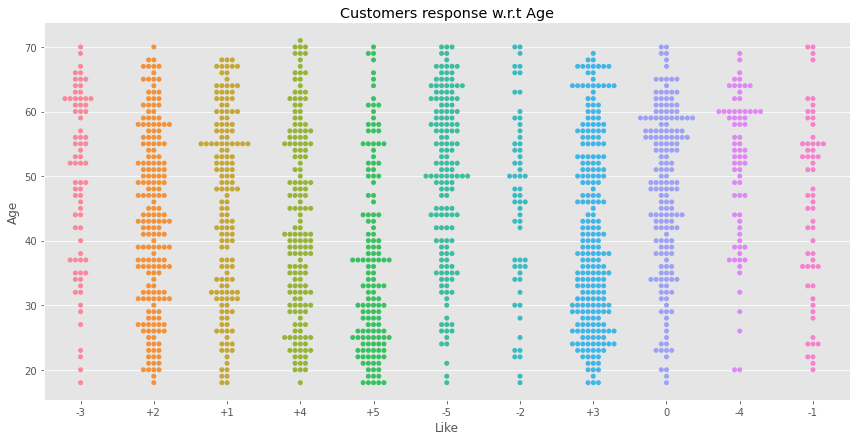

In [11]:
sns.catplot(x="Like", y="Age",data=data,height=6, aspect=2,kind="swarm")
plt.title('Customers response w.r.t Age');

In [12]:
# visit frequently

data["VisitFrequency"].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

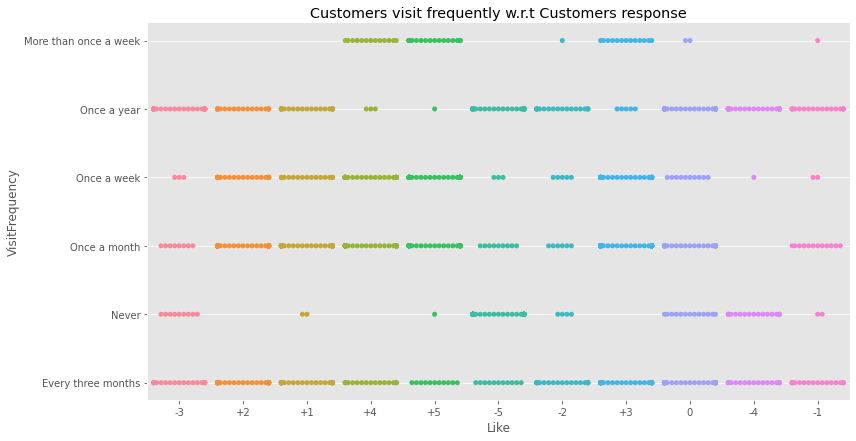

In [13]:
sns.catplot(x="Like", y="VisitFrequency",data=data,height=6, aspect=2,kind="swarm")
plt.title('Customers visit frequently w.r.t Customers response');

(15.0, 75.0)

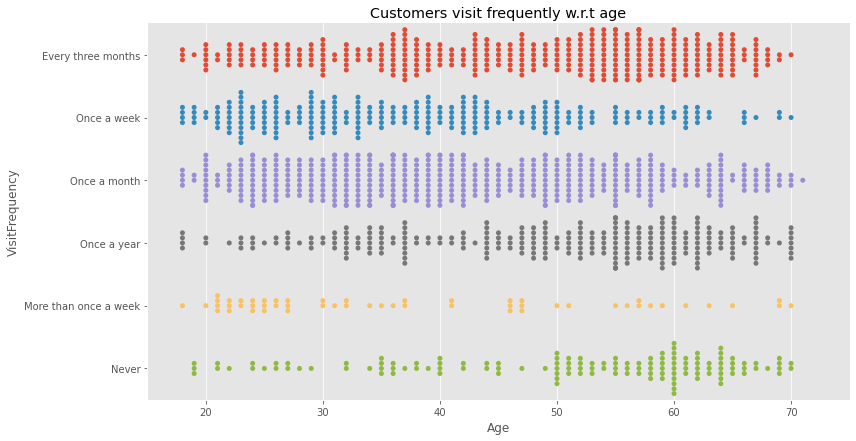

In [14]:
sns.catplot(x="Age", y="VisitFrequency",data=data,height=6, aspect=2,kind="swarm")
plt.title('Customers visit frequently w.r.t age');
plt.xlim(15,75)

In [15]:
for i in data.columns:
    if "Yes" in data[i].values:
        data[i]=data[i].map({"Yes":1, "No":0})
    
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


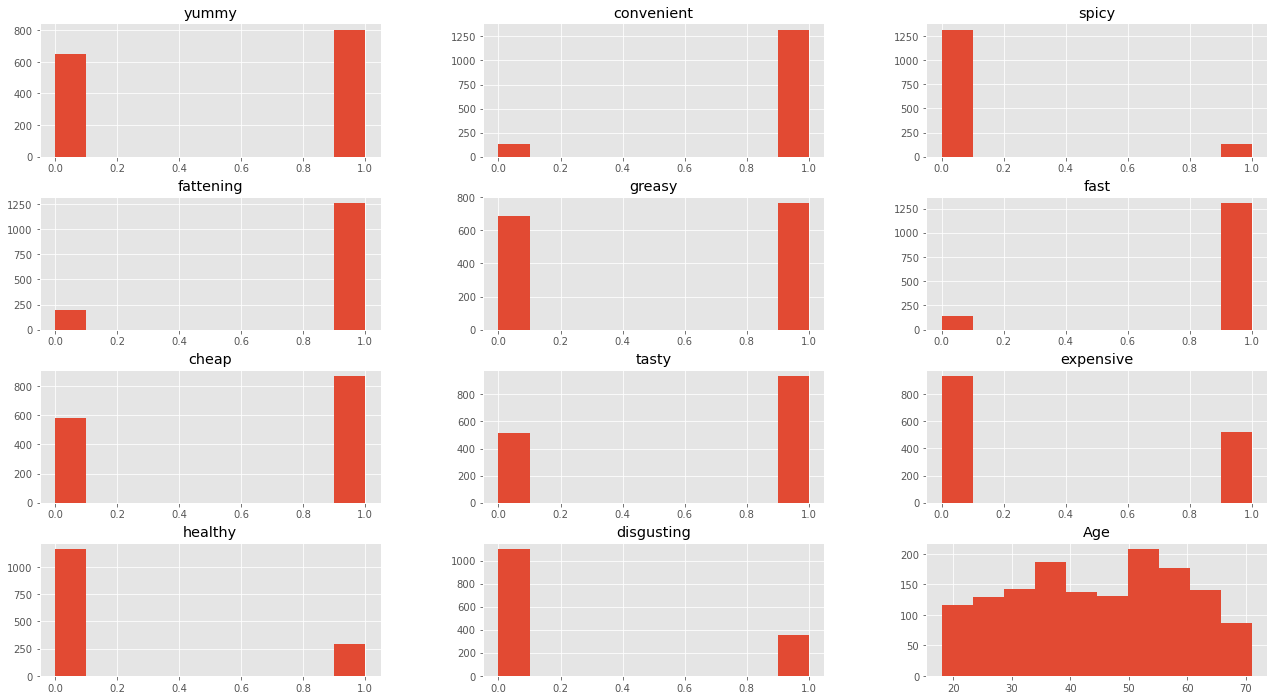

In [16]:
data.hist(figsize=(22,12));

In [17]:
#Principal component analysis

x = data.loc[:,lis].values

from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11']
pca_df = pd.DataFrame(data = pc, columns = names)
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [18]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [19]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [20]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PCA"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data.iloc[:,0:11].columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


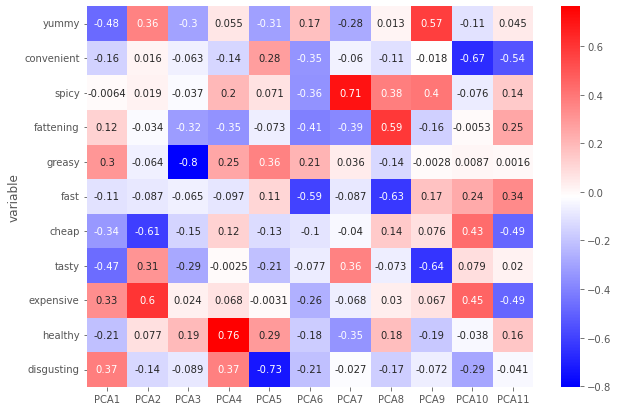

In [21]:
#correlation heatmap

plt.rcParams['figure.figsize'] = (10,7)
ax = sns.heatmap(loadings_df, annot=True, cmap="bwr")


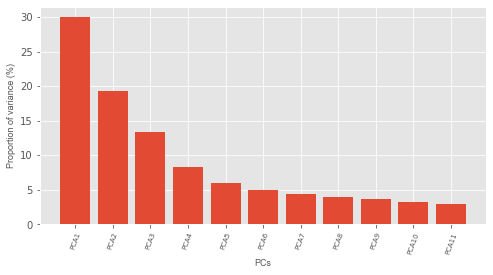

In [22]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(8,4))


In [23]:
# get PC scores
pca_scores = PCA().fit_transform(x)
pca_scores

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

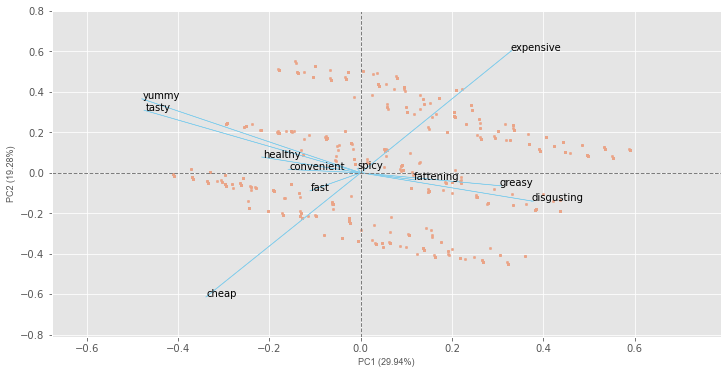

In [24]:
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(12,6))

In [25]:
#Extracting segments

plt.rcParams['figure.figsize'] = [10,5]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data.iloc[:,0:11])
data['clust_no'] = kmeans.labels_ #adding to df
print (kmeans.labels_, "\n") #Label assigned 
print (kmeans.inertia_, "\n") 
print(kmeans.n_iter_, "\n") 
print(kmeans.cluster_centers_)


[2 0 0 ... 0 1 3] 

1603.0604440558925 

8 

[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [26]:
#sizing of the each cluster
from collections import Counter
Counter(kmeans.labels_)


Counter({2: 304, 0: 323, 1: 580, 3: 246})

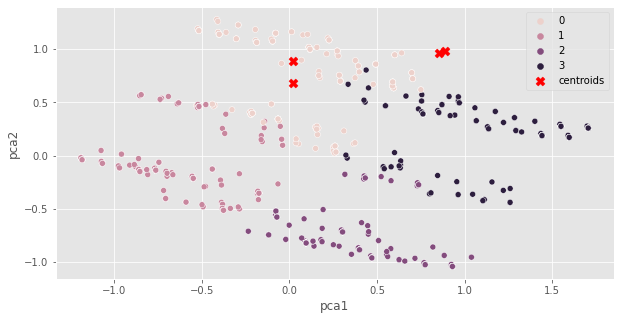

In [29]:
#Visulazing clusters
sns.scatterplot(data=pca_df, x="pca1", y="pca2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

In [30]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(data['clust_no'],data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
clust_no,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


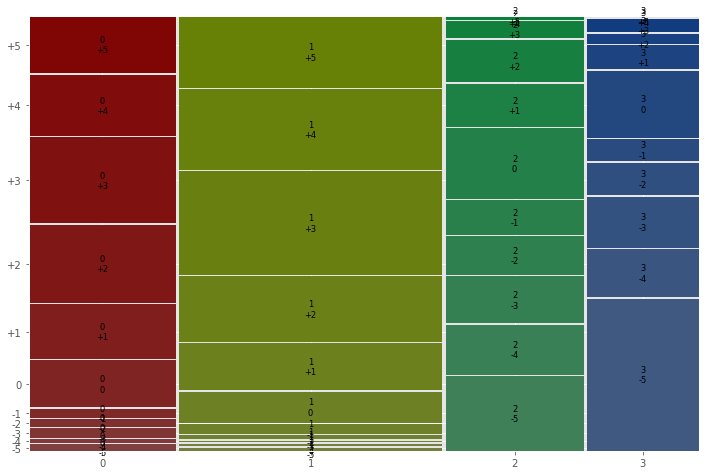

In [31]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (12,8)
mosaic(crosstab.stack())
plt.show()

In [32]:
crosstab_gender =pd.crosstab(data['clust_no'],data['Gender'])
crosstab_gender

Gender,Female,Male
clust_no,,
0,154,169
1,349,231
2,179,125
3,106,140


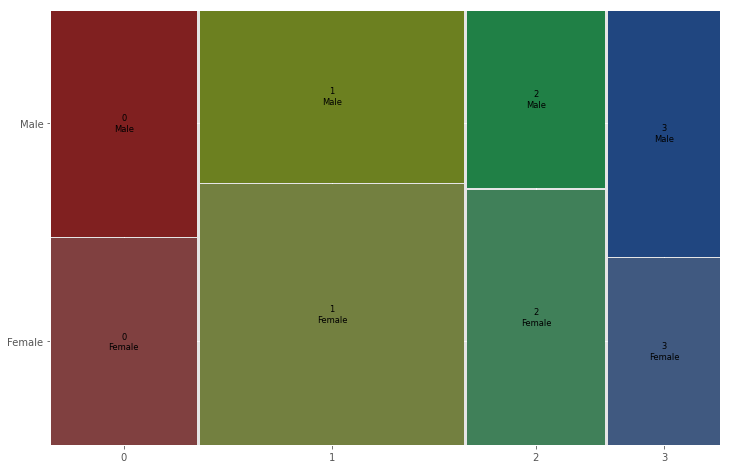

In [33]:
plt.rcParams['figure.figsize'] = (12,8)
mosaic(crosstab_gender.stack())
plt.show()

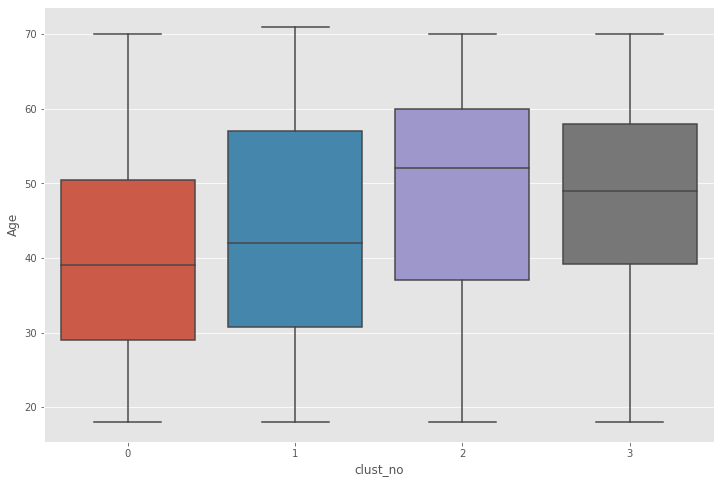

In [34]:
sns.boxplot(x="clust_no", y="Age", data=data)
plt.show()

In [35]:
#Calculating the mean
#Visit frequency
from sklearn.preprocessing import LabelEncoder 
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('clust_no')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,clust_no,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [36]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('clust_no')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,clust_no,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [37]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('clust_no')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender


,clust_no,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [38]:
segment = Gender.merge(Like, on='clust_no', how='left').merge(visit, on='clust_no', how='left')
segment

,clust_no,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


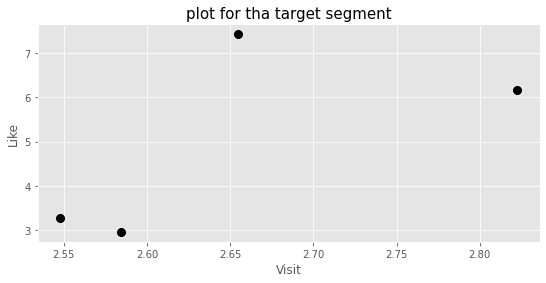

In [39]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=100, color="black")
plt.xlabel("Visit") 
plt.ylabel("Like")
plt.title("plot for tha target segment",fontsize = 15) 
 
plt.show()